In [2]:
#Third Year Paper Code
import numpy as np
import random 
import matplotlib.pyplot as plt

In [3]:
# Simulation Setting
# Based on DO (1999) lab setting
# with u = 100
# start with production good in storage
# constant gain learning with gamma = 0.7

In [26]:
#Basic Parameters
u = 100
β = 0.9
c_1 = 1
c_2 = 4
c_3 = 9
t = 1
γ = 0.7

In [5]:
#initial value for Q
#When initial condition is production good in storage
#based on rational expectation
shock = 0
Q_12 = 65 + shock
Q_13 = 103 + shock
Q_11 = Q_12 + u
Q_21 = 256 + shock
Q_23 = 244 + shock
Q_22 = Q_23 + u
Q_31 = 290 + shock
Q_32 = 230 + shock
Q_33 = Q_31 + u

In [25]:
# Create agents
# Agents have there type which same as there consumption type, they also have production type
class Agent:
    agentCount = 0

    def __init__(self, id, consume_type, product_type):
        self.id = id
        self.consume_type = consume_type
        self.product_type = product_type
        self.storage_type = product_type
        self.opposite_storage = 0
        self.trading_result = False
        self.trading = False
        self.original_storage = self.storage_type

        #generate type 1 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 1:
            self.Q_2 = 50 + random.randint(1,10)
        if self.consume_type == 1:
            self.Q_3 = 50 + random.randint(1,10)
        if self.consume_type == 1:
            self.Q_1 = 9999
            
        #generate type 2 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 2:
            self.Q_1 = 256 + random.randint(1,50)
        if self.consume_type == 2:
            self.Q_3 = 244 + random.randint(1,50)
        if self.consume_type == 2:
            self.Q_2 = 9999
            
        #generate type 3 agents' Q(precieved value for holding good 1 , 2 , 3)
        if self.consume_type == 3:
            self.Q_1 = 290 + random.randint(1,80)
        if self.consume_type == 3:
            self.Q_2 = 230 + random.randint(1,80)
        if self.consume_type == 3:
            self.Q_3 = 9999

        # other characteristics wait to be added
        Agent.agentCount += 1

    def displayAgent(self):
        print("Agent id:", self.id, "consume:", self.consume_type, ",produce:", self.product_type, ",storage:",
              self.storage_type, "Q_1:", self.Q_1, "Q_2:", self.Q_2, "Q_3:", self.Q_3,"opposite:",self.opposite_storage,"trading:",self.trading,"trading_reuslt:",self.trading_result)

        


In [7]:
# matching process
# update agent's information of what situation he is facing
def match(mylist):
    random.shuffle(mylist)
    matchlist = dict()
    index = list(range(0, len(mylist), 2))
    for i in index:
        matchlist[mylist[i]] = mylist[i + 1]
    for key in matchlist:
        update_opposite_storage(key,matchlist[key]) 
        key.original_storage = key.storage_type #easy to update Q at the end of the round
        matchlist[key].original_storage = matchlist[key].storage_type
    return matchlist

# update what good the other agent is holding
def update_opposite_storage(agent1, agent2):
    storage_1 = agent1.storage_type
    storage_2 = agent2.storage_type
    agent1.opposite_storage = storage_2
    agent2.opposite_storage = storage_1

In [8]:
#get the parameters for decision making and updating Q
def get_Q_hold(agent):
    if agent.storage_type == 1:
        return agent.Q_1
    elif agent.storage_type == 2:
        return agent.Q_2
    elif agent.storage_type == 3:
        return agent.Q_3

def get_original_Q_hold(agent):
    if agent.original_storage == 1:
        return agent.Q_1
    elif agent.original_storage == 2:
        return agent.Q_2
    elif agent.original_storage == 3:
        return agent.Q_3

def set_Q_hold(agent,update_value):
    if agent.storage_type == 1:
        agent.Q_1 = update_value
    elif agent.storage_type == 2:
        agent.Q_2 = update_value
    elif agent.storage_type == 3:
        agent.Q_3 = update_value
        
def set_original_Q_hold(agent,update_value):
    if agent.original_storage == 1:
        agent.Q_1 = update_value
    elif agent.original_storage == 2:
        agent.Q_2 = update_value
    elif agent.original_storage == 3:
        agent.Q_3 = update_value

def get_Q_trade(agent):
    if agent.opposite_storage == 1:
        return agent.Q_1
    elif agent.opposite_storage == 2:
        return agent.Q_2
    elif agent.opposite_storage == 3:
        return agent.Q_3

def get_C_hold(agent):
    if agent.storage_type == 1:
        return c_1
    elif agent.storage_type == 2:
        return c_2
    elif agent.storage_type == 3:
        return c_3

def get_C_trade(agent):
    if agent.opposite_storage == 1:
        return c_1
    elif agent.opposite_storage == 2:
        return c_2
    elif agent.opposite_storage == 3:
        return c_3


In [9]:
# trading decision by each agent
def transaction_decision(agent):
    Q_hold = get_Q_hold(agent)
    Q_trade = get_Q_trade(agent)
    C_hold = get_C_hold(agent)
    C_trade = get_C_trade(agent)

    if β * Q_hold - C_hold < β * Q_trade - C_trade:
        agent.trading = True
    else:
        agent.trading = False
        
# trading results 
def produce_outcome(matched_list):
    trade_outcome = list()
    for key in matched_list.keys():
        if key.trading == True and matched_list[key].trading == True:
            trade_outcome.append(True)
            key.trading_result = True
            matched_list[key].trading_result = True
        else:
            trade_outcome.append(False)
            key.trading_result = False
            matched_list[key].trading_result = False
    return trade_outcome



In [10]:
# based on trading result, updates Q and storage

def update_trading(agent):
    if(agent.trading_result == False): #if there is trade
        v_prime = get_C_hold(agent)*(-1) + β * get_Q_hold(agent)
        updated_value = get_Q_hold(agent) + γ * (v_prime - get_Q_hold(agent))
        set_Q_hold(agent,updated_value)
    else: #if trade happened 
        if agent.consume_type == agent.opposite_storage: #agent gets his own consumption good
            agent.storage_type = agent.product_type #agent eats the consumption good and produces another production good 
            v_prime = get_C_hold(agent) * (-1) + β * get_Q_hold(agent) + u
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent,updated_value)
        else: #agent does not get his cons good
            agent.storage_type = agent.opposite_storage 
            v_prime = get_C_hold(agent) *(-1) + β * get_Q_hold(agent)
            updated_value = get_original_Q_hold(agent) + γ * (v_prime - get_original_Q_hold(agent))
            set_original_Q_hold(agent, updated_value)

In [11]:
# Global behavior recorder

def global_a1_s2_f3(mylist,count_down,count_up): #agent 1 holding 2 facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1 and ele.storage_type == 2 and ele.opposite_storage == 3):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s3_f1(mylist,count_down,count_up): #agent 2 holding 3 facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2 and ele.storage_type == 3 and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s1_f2(mylist,count_down,count_up): #agent 3 holding 1 facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3 and ele.storage_type == 1 and ele.opposite_storage == 2):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a1_s_f1(mylist,count_down,count_up): #agent 1 holding ANY good facing opportunity for 1
    result = list()
    for ele in mylist:
        if (ele.consume_type == 1  and ele.opposite_storage == 1):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a2_s_f2(mylist,count_down,count_up): #agent 2 holding ANY good facing opportunity for 2
    result = list()
    for ele in mylist:
        if (ele.consume_type == 2  and ele.opposite_storage ==2 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

def global_a3_s_f3(mylist,count_down,count_up): #agent 3 holding ANY good facing opportunity for 3
    result = list()
    for ele in mylist:
        if (ele.consume_type == 3  and ele.opposite_storage ==3 ):
            count_down += 1
            if (ele.trading == True):
                count_up += 1

    result.append(count_up)
    result.append(count_down)
    return result

In [ ]:
# main code

if __name__ == '__main__':
    u = 100
    β = 0.9
    c_1 = 1
    c_2 = 4
    c_3 = 9
    t = 1

    mylist = list()
    agent1 = Agent(1, 1, 2)
    mylist.append(agent1)
    agent2 = Agent(2, 1, 2)
    mylist.append(agent2)
    agent3 = Agent(3, 1, 2)
    mylist.append(agent3)
    agent4 = Agent(4, 1, 2)
    mylist.append(agent4)
    agent5 = Agent(5, 1, 2)
    mylist.append(agent5)
    agent6 = Agent(6, 1, 2)
    mylist.append(agent6)
    agent7 = Agent(7, 1, 3)
    mylist.append(agent7)
    agent8 = Agent(8, 1, 3)
    mylist.append(agent8)
    agent9 = Agent(9, 2, 3)
    mylist.append(agent9)
    agent10 = Agent(10, 2, 3)
    mylist.append(agent10)
    agent11 = Agent(11, 2, 3)
    mylist.append(agent11)
    agent12 = Agent(12, 2, 3)
    mylist.append(agent12)
    agent13 = Agent(13, 2, 3)
    mylist.append(agent13)
    agent14 = Agent(14, 2, 1)
    mylist.append(agent14)
    agent15 = Agent(15, 2, 1)
    mylist.append(agent15)
    agent16 = Agent(16, 2, 1)
    mylist.append(agent16)
    agent17 = Agent(17, 3, 1)
    mylist.append(agent17)
    agent18 = Agent(18, 3, 1)
    mylist.append(agent18)
    agent19 = Agent(19, 3, 1)
    mylist.append(agent19)
    agent20 = Agent(20, 3, 1)
    mylist.append(agent20)
    agent21 = Agent(21, 3, 1)
    mylist.append(agent21)
    agent22 = Agent(22, 3, 1)
    mylist.append(agent22)
    agent23 = Agent(23, 3, 1)
    mylist.append(agent23)
    agent24 = Agent(24, 3, 1)
    mylist.append(agent24)

    game_continue = True

    count_round = 0
    sum_up123 = 0
    sum_down123 = 0
    sum_up231 = 0
    sum_down231 = 0
    sum_up312 = 0
    sum_down312 = 0
    
    result_list_123_each_round = []
    result_list_123_sum = []
    result_list_231_each_round = []
    result_list_231_sum = []
    result_list_312_each_round = []
    result_list_312_sum = []
    
    
    sum_up11 = 0
    sum_down11 = 0
    sum_up22 = 0
    sum_down22 = 0
    sum_up33 = 0
    sum_down33 = 0
    
    t_list = []
    
    while(count_round < 1000):
        count_round += 1
        t_list.append(count_round)
        matched_list = match(mylist)

        for key in matched_list.keys():
            transaction_decision(key)
            transaction_decision(matched_list[key])

        global_r1_2_3 = global_a1_s2_f3(mylist,0,0)
        sum_up123 = sum_up123 + global_r1_2_3[0]
        sum_down123 = sum_down123 + global_r1_2_3[1]
        result_list_123_each_round.append( (global_r1_2_3[0]+0.1) / (global_r1_2_3[1]+0.1) )
        result_list_123_sum.append((sum_up123+0.1)/(sum_down123+0.1))
        
        global_r2_3_1 = global_a2_s3_f1(mylist,0,0)
        sum_up231 = sum_up231 + global_r2_3_1[0]
        sum_down231 = sum_down231 + global_r2_3_1[1]
        result_list_231_each_round.append( (global_r2_3_1[0]+0.1) / (global_r2_3_1[1]+0.1) )
        result_list_231_sum.append((sum_up231+0.1)/(sum_down231+0.1))
        
        global_r3_1_2 = global_a3_s1_f2(mylist,0,0)
        sum_up312 = sum_up312 + global_r3_1_2[0]
        sum_down312 = sum_down312 + global_r3_1_2[1]
        result_list_312_each_round.append( (global_r3_1_2[0]+0.1) / (global_r3_1_2[1]+0.1) )
        result_list_312_sum.append((sum_up312+0.1)/(sum_down312+0.1))
        
        global_r1_1 = global_a1_s_f1(mylist,0,0)
        sum_up11 = sum_up11 + global_r1_1[0]
        sum_down11 = sum_down11 + global_r1_1[1]
        
        global_r2_2 = global_a2_s_f2(mylist,0,0)
        sum_up22 = sum_up22 + global_r2_2[0]
        sum_down22 = sum_down22 + global_r2_2[1]
        
        global_r3_3 = global_a3_s_f3(mylist,0,0)
        sum_up33 = sum_up33 + global_r3_3[0]
        sum_down33 = sum_down33 + global_r3_3[1]
        
        

        for ele in mylist:
            ele.displayAgent()

        produce_outcome(matched_list)

        for key in matched_list.keys():
            update_trading(key)
            update_trading(matched_list[key])

        print(count_round)

        stopping_draw = random.uniform(0, 1)
        if stopping_draw > 0.01:
            game_continue = True
        else:
            game_continue = False

    print("Agent 1 with good 2 facing good 3:", sum_up123/sum_down123)
    print("Agent 2 with good 3 facing good 1:", sum_up231/sum_down231)
    print("Agent 3 with good 1 facing good 2:", sum_up312/sum_down312)
    
    print("Agent 1 facing good 1:", sum_up11/sum_down11)
    print("Agent 2 facing good 2:", sum_up22/sum_down22)
    print("Agent 3 facing good 3:", sum_up33/sum_down33)
    
    

Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 324 Q_2: 254 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 339 Q_2: 238 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 57 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 258 Q_2: 9999 Q_3: 255 opposite: 2 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 257 Q_2: 9999 Q_3: 291 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 280 Q_2: 9999 Q_3: 275 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 58 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 366 Q_2: 290 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 1

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 240.821 Q_2: 9999 Q_3: 258.2 opposite: 1 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 38.022628999999995 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 2 Q_1: 9999 Q_2: 59 Q_3: 44.214740000000006 opposite: 2 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 3 Q_1: 254.13000000000002 Q_2: 9999 Q_3: 239.52690000000004 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 41.11071 Q_3: 56 opposite: 3 trading: False trading_reuslt: True
4
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 292.64417511000005 Q_2: 273 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 258 Q_2: 9999 Q_3: 218.09094950000002 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce:

Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 287.470383334554 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 146.1040083449 Q_3: 60 opposite: 3 trading: False trading_reuslt: False
7
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 257.75979 Q_2: 9999 Q_3: 238.37365811 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 60.64579293732646 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 307.2737713131931 Q_2: 254 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 214.60968531954185 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 283.8908881291 Q_2: 9999 Q_3: 258.2 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storag

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 245.20137887216612 Q_2: 254 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 191.65324027409608 Q_3: 144.38026799006997 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 101.49814806968911 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 294.47109097016136 Q_2: 9999 Q_3: 288 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 322.9104789688837 opposite: 1 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 229.75847751145923 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 335.91746140503005 Q_2: 9999 Q_3: 238.37365811 opposite: 2 trading: True trading_reuslt: True
Agent id: 10

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 328.95419247543003 Q_2: 238 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 138.91502588689093 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 266.8723916980701 Q_2: 291.147705719632 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 227.03797319999998 Q_2: 9999 Q_3: 254.28410856472874 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 242.1274341319744 opposite: 3 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 263.8885242707464 Q_2: 279.36739226797346 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 299.0779398651885 Q_2: 9999 Q_3: 178.39624833664413 opposite: 1 trading:

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 253.22927270306198 Q_3: 60 opposite: 3 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 319.3283689105222 Q_2: 9999 Q_3: 272.1116747686516 opposite: 2 trading: True trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 3 Q_1: 251.14111397402775 Q_2: 9999 Q_3: 214.04694599999996 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 177.14902653609255 opposite: 3 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 252.10427963624304 Q_2: 289.5031197744771 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 340.5083427765008 Q_3: 55 opposite: 2 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 266.8723916980701 Q_2: 226.36097512952603 Q_3: 9999 opposite: 2 trading: Fals

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 294.56693157966083 Q_2: 299.7443188309219 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 305.4033072276756 Q_2: 9999 Q_3: 239.03905381222907 opposite: 1 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 166.6148957224937 Q_3: 168.78373451149227 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 318.7864621955607 Q_2: 279.36739226797346 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 304.2506038612293 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 280.9609494761366 Q_2: 9999 Q_3: 215.34799973763745 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 2 Q_1: 193.6341957567841 Q_2: 183.951965663

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 188.79994937305696 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 352.88399446646764 Q_3: 144.38026799006997 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 318.64828422027267 Q_2: 9999 Q_3: 236.45017547626935 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 218.61216311827656 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 166.12321591004257 Q_2: 246.4751330257439 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
24
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 183.98841495220307 Q_2: 254 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 291.11232060691225 Q_2: 238 Q_3: 9999 opposite: 1 trad

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 216.03593948570918 Q_2: 254 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 362.8830477832563 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 280.14370688130157 Q_2: 275.1039869903137 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 270.07463246359663 Q_2: 9999 Q_3: 215.34799973763745 opposite: 2 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 286.9595213378727 Q_2: 9999 Q_3: 238.37365811 opposite: 2 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 271.52523739099826 Q_2: 255.46875593272406 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 218.08601615699848 Q_2: 268.12420017890906 Q_3: 9999 o

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 240.94529208163775 Q_2: 258.3217314323141 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 215.10810736882442 Q_2: 9999 Q_3: 278.16595661682607 opposite: 1 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 173.4625836979948 Q_2: 268.12420017890906 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 142.95844157416633 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 289.4044697047672 Q_2: 9999 Q_3: 238.37365811 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 223.9783863515681 Q_2: 279.02418152652734 Q_3: 9999 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 115.72040172579156 Q_3: 35.47817 opposite

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 281.39352573579225 Q_2: 9999 Q_3: 210.83313429797096 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 167.70690318927169 Q_3: 60 opposite: 3 trading: False trading_reuslt: False
34
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 242.85401157715125 Q_2: 254 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 132.79194950898582 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 167.14521228455553 Q_2: 190.3916161080699 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 230.82474751505436 Q_2: 9999 Q_3: 236.62015230079214 opposite: 2 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 215.10810736882442 Q_2: 9999 Q_3: 185.40728386078956 opposite: 

Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 506.8818989415067 Q_2: 9999 Q_3: 224.3399051 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 198.8423615890263 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 192.06040757105583 Q_2: 9999 Q_3: 215.34799973763745 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 267.88341738058904 Q_2: 9999 Q_3: 236.62015230079214 opposite: 1 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 242.24671699665413 Q_2: 221.38981704901312 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 273.1550069056043 Q_2: 236.75766997771223 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 160.8042667720974 Q_3: 60 opposite: 1 tra

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 281.39352573579225 Q_2: 9999 Q_3: 123.63006253909467 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 262.4344075901945 Q_3: 144.38026799006997 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 282.6575254406645 Q_3: 54 opposite: 2 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 186.98736210602834 Q_2: 9999 Q_3: 175.2941300535987 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 344.163640977114 Q_2: 9999 Q_3: 238.37365811 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 264.14297962233707 Q_2: 280.1278500471544 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 150.8979525730223 opposite: 1 trad

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 251.37819693387826 Q_2: 280.1278500471544 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 281.39352573579225 Q_2: 9999 Q_3: 201.12837207767666 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 324.93282350184853 Q_2: 9999 Q_3: 238.37365811 opposite: 1 trading: False trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 2 Q_1: 190.28368384045277 Q_2: 186.07605276569146 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 216.50918762713403 opposite: 2 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 209.59964006593967 Q_3: 219.23143276186073 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 225.91232550339572 Q_2: 9999 Q_3: 256.656721877

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 227.00101627164713 Q_2: 9999 Q_3: 63.61792146930136 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 315.60796916234096 Q_2: 9999 Q_3: 270.6381091470961 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 156.54281063219867 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 225.91232550339572 Q_2: 9999 Q_3: 188.8357608389415 opposite: 3 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 224.38442218026464 Q_2: 9999 Q_3: 201.12837207767666 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 141.97504634870472 Q_3: 144.38026799006997 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 210.1788085475571 Q_2: 199.36770876372333 Q

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 203.12636809168876 Q_2: 170.15259342248194 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 257.7262010630157 Q_2: 9999 Q_3: 204.7141439792838 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 217.34835718265677 Q_3: 54 opposite: 3 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 404.96558048421485 Q_2: 9999 Q_3: 224.3399051 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 322.04663215896363 Q_2: 9999 Q_3: 221.91590060132341 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 177.08876107996167 Q_2: 9999 Q_3: 175.2941300535987 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 252.5194976069609 Q_2: 148.19661648662162 Q_3: 99

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 205.73459803498764 Q_2: 170.15259342248194 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 252.6164728864148 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 260.7729377354832 Q_2: 9999 Q_3: 257.2105870196452 opposite: 2 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 217.53715334843983 Q_2: 9999 Q_3: 124.64226789099385 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 186.26089911367728 Q_2: 248.89296016941222 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
57
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 289.4797511996419 Q_2: 148.19661648662162 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 184.2098823556028 Q_2: 208.80518476670983 Q

Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 238.56266224080645 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 255.91110828149797 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
60
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 146.21407834190558 Q_2: 208.80518476670983 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 115.84426484140938 Q_3: 98.52540921968873 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 265.43587013725687 Q_2: 9999 Q_3: 241.31112647132312 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 221.45638039975555 Q_2: 228.67045295755338 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 338.2286896866146 Q_2: 170.15259342248194 Q_3: 9999 op

Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 199.50548864187303 Q_2: 9999 Q_3: 226.6420145729259 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 304.02854783738434 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 280.2000648906251 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 207.49708396301858 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 288.8928042421733 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 228.26124529395995 Q_2: 208.80518476670983 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 238.619862796672 Q_2: 248.42759158286682 Q_3: 9999 opposite: 2

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 320.9344957549694 Q_2: 170.15259342248194 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 291.70397983683876 Q_2: 9999 Q_3: 235.08435730918603 opposite: 1 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 2 Q_1: 187.568911719451 Q_2: 208.80518476670983 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 219.61901196524175 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 255.90121420909682 Q_2: 299.6621490280721 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 209.59964006593967 Q_3: 295.23240423105267 opposite: 1 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 277.42013955273467 Q_2: 193.5402975598784 Q_3: 

Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 271.5105419385198 Q_2: 275.88579859610707 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 209.6965935351589 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 279.90294453649244 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 289.732323827635 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 354.4042047278414 Q_2: 170.15259342248194 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 293.9484460923248 Q_2: 9999 Q_3: 250.1680832092999 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 100.01481886467124 Q_2: 102.36413928332463 Q_3: 999

Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 196.8384201641063 Q_2: 9999 Q_3: 180.65382103178905 opposite: 2 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 272.1821340500298 Q_2: 193.5402975598784 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 209.59964006593967 Q_3: 239.44762655350175 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 171.69497132596317 Q_2: 148.19661648662162 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 345.04335545172773 Q_2: 9999 Q_3: 296.9164455592129 opposite: 1 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 237.61797552576311 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 383.7201977696031 Q_3: 151.9636107925

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 256.0531798559752 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 219.30399296831084 Q_2: 9999 Q_3: 196.8473790464023 opposite: 2 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 304.6426635031555 Q_2: 9999 Q_3: 102.27164641105661 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 350.6574473932905 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 342.07797498204195 Q_2: 234.57712741167816 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 284.5838435688497 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 349.4185113435645 opposite: 3 trading: F

Agent id: 21 consume: 3 ,produce: 1 ,storage: 2 Q_1: 173.35983211294774 Q_2: 154.15338539261376 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 454.98670971595845 Q_2: 9999 Q_3: 215.4665513320456 opposite: 2 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 263.44935552877547 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 253.50504668972667 Q_2: 9999 Q_3: 212.03859816847404 opposite: 3 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 350.05281189198195 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 292.6158990217179 Q_2: 9999 Q_3: 255.73365002089153 opposite: 2 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 223.02984808269153 Q_2: 9999 Q_3: 239.1684807

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 404.2847096149989 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 237.2727707185398 Q_2: 93.01857766974028 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 329.44148770314143 Q_2: 9999 Q_3: 272.956185614664 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 148.5879187944885 Q_2: 154.7627098489412 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
85
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 219.963676768242 Q_2: 93.01857766974028 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 214.83103900455347 Q_2: 148.19661648662162 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 262.388624068445 Q_2: 234.577127

Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 171.36897078834878 opposite: 1 trading: True trading_reuslt: False
89
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 580.2269819865785 Q_2: 9999 Q_3: 215.4665513320456 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 200.3762718017407 Q_2: 9999 Q_3: 228.3848413762971 opposite: 1 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 262.6173412734188 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 2 Q_1: 153.62744825492584 Q_2: 155.44191188290822 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 209.59964006593967 Q_3: 246.44704442908073 opposite: 1 trading: True trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 208.89324148471889 Q_2: 9999 Q_3: 204.35322245328823 opposi

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 250.51374451980814 Q_2: 9999 Q_3: 183.74849688155805 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 200.3762718017407 Q_2: 9999 Q_3: 166.09507585491423 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 190.3810319086444 Q_2: 148.19661648662162 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 267.25852837479124 Q_2: 9999 Q_3: 224.3399051 opposite: 2 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 191.98867534827522 Q_2: 209.98862848172325 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 2 Q_1: 153.62744825492584 Q_2: 117.20506991640042 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 268.5123767746633 Q_3

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 142.17352687708103 Q_2: 194.87529189181168 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 311.4516511480888 Q_3: 151.96361079256133 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 250.51374451980814 Q_2: 9999 Q_3: 179.87811332672825 opposite: 2 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 440.973539247339 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 2 Q_1: 9999 Q_2: 175.87872869303123 Q_3: 177.75173959466196 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 321.32630355616425 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 332.50379944040463 Q_2: 9999 Q_3: 224.3399051 op

Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 377.3206282311991 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 235.08192174985584 Q_2: 93.01857766974028 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 221.57395623010558 Q_2: 153.4790132064725 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 243.42781287010874 Q_2: 243.11741490156615 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 222.44519643666715 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 211.0439305822283 Q_2: 271.5418603476134 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 283.4471140591466 Q_3: 151.96361079256

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 250.36182440344925 Q_2: 9999 Q_3: 239.27485600241965 opposite: 1 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 228.4472145525464 Q_3: 148.33274711913924 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 426.2177685621627 Q_3: 169.7395096159945 opposite: 3 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 369.0951856275054 Q_2: 9999 Q_3: 258.3112567797265 opposite: 2 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 2 Q_1: 96.6964990123524 Q_2: 117.37537987886614 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 187.1333593329488 Q_2: 93.01857766974028 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 256.38904799555513 Q_2: 9999 Q_3: 1

Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 86.5062616035178 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 2 Q_1: 128.1901104795547 Q_2: 151.05120975754093 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 320.1645859758945 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 436.4711238118561 Q_3: 54 opposite: 1 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 249.36199389811503 Q_2: 9999 Q_3: 209.2504125817822 opposite: 2 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 205.07754426783077 Q_2: 9999 Q_3: 215.6322920908948 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 391.75429982239257 Q_2: 9999 Q_3: 224.3399051 opposite: 3 tradin

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 277.9994923468827 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 2 Q_1: 135.8396012470757 Q_2: 115.6261986257186 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 275.0644215516959 Q_2: 9999 Q_3: 213.68031250267077 opposite: 3 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 228.4472145525464 Q_3: 289.5668479868799 opposite: 1 trading: True trading_reuslt: True
111
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 232.65801215440314 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 219.78600594924814 Q_2: 156.96149269330212 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 2 Q_1: 135.8396012470757 Q_2: 104.7323647219183 Q_3: 9999 

Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 366.94777786967234 Q_2: 93.01857766974028 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 109.52062655376687 Q_2: 180.93464204373748 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 125.6308291597804 Q_2: 113.2592785430729 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 72.50896127452418 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 282.72585547622674 Q_2: 148.19661648662162 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 355.67390864746443 Q_2: 9999 Q_3: 322.9684238566486 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 476.0770978244683 Q_2: 9999 Q_3: 224.339905

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 236.0905026341352 Q_2: 9999 Q_3: 215.15246937735006 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 395.9839572852514 Q_2: 284.3234684003042 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.8206654022161 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 233.55734403228655 Q_2: 9999 Q_3: 265.7113085963434 opposite: 1 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 414.15395004256015 Q_2: 9999 Q_3: 224.3399051 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 269.2842623367011 Q_2: 9999 Q_3: 121.26686139349746 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 147.76390437094034 Q_2: 113.2592785430

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 164.47986139481338 Q_2: 230.3747739633037 Q_3: 9999 opposite: 2 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 242.97826336050403 Q_2: 9999 Q_3: 220.19081509353754 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 195.92312488566387 Q_2: 148.19661648662162 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 270.07320649797106 Q_2: 9999 Q_3: 155.45152481095715 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 364.4900269637278 Q_2: 9999 Q_3: 255.95965116794935 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 214.6346948636652 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 411.1668245502742

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 234.37058668581477 Q_2: 173.29339036151825 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 252.14487738969896 Q_3: 207.60456925357104 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 253.22020242066282 Q_2: 9999 Q_3: 205.27679105492925 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 164.37135796516037 Q_2: 106.22606328760595 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 247.56246139425258 Q_2: 259.17087377864607 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 299.3809005512423 Q_2: 284.3234684003042 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 252.4376826891893 

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 137.00791518224727 Q_2: 113.2592785430729 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 342.31641998393815 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 239.20588144640865 Q_2: 9999 Q_3: 215.4665513320456 opposite: 2 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 238.75045718444366 Q_2: 9999 Q_3: 231.1504598873666 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 347.31613763921683 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 299.02122539349523 Q_2: 9999 Q_3: 240.89457717554407 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 176.74383481226775 Q_2: 106.22606328760595

Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 246.5048587101191 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 216.47346011689328 Q_2: 93.01857766974028 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 252.61861971045118 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 325.20909026322533 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 222.91928187542484 Q_2: 148.19661648662162 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 316.8971961728499 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 367.39755642498915 Q_3: 35.47817 opposite: 1 trading: Tr

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 161.77466024907582 Q_2: 203.29232631767263 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 280.94992688437407 Q_2: 9999 Q_3: 216.3246458588518 opposite: 1 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 255.55218863749528 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 321.92925438293213 Q_2: 9999 Q_3: 244.574378416373 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 210.32542371889434 Q_3: 60 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 249.24317132407307 opposite: 2 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 298.8807700593082 Q_3: 151.96361079256133 opposite: 2 trading: Fals

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.36384818112535 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 234.8647325138361 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 264.59632734761794 Q_2: 9999 Q_3: 168.2889792919297 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 265.52884154839154 Q_3: 210.0324138994691 opposite: 3 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 169.5078462845878 Q_2: 9999 Q_3: 206.1510753968805 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 225.84974222328123 Q_2: 221.78869921136723 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 107.85929864758248 Q_2: 93.01857766974028 Q_3: 9999 opposite

Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 175.7415728483686 Q_2: 9999 Q_3: 268.4616818394153 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 485.4212919300728 Q_2: 9999 Q_3: 215.4665513320456 opposite: 1 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 254.00027042208222 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 306.48496646545567 Q_2: 167.94914066101862 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 245.3745844332847 Q_2: 9999 Q_3: 206.0139276858763 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 225.3397698643879 Q_2: 257.33631251232424 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 169.5078462845878 Q_2: 9999 

Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 325.7474292059913 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 137.03033824588354 Q_2: 113.2592785430729 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 265.52884154839154 Q_3: 175.54563466946527 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 384.7381106434925 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 411.02801085297494 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 179.92749322978216 Q_3: 151.96361079256133 opposite: 3 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 252.11247482540315 Q_2: 9999 Q_3: 206.0139276858

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 180.42927985647233 Q_2: 167.94914066101862 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 2 Q_1: 120.41045956680291 Q_2: 143.60826578041517 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 201.80071904461533 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 241.30711358123375 Q_2: 93.01857766974028 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 379.83450491384355 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 265.52884154839154 Q_3: 249.23649006582707 opposite: 2 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 524.2998277256663 Q_2: 9999 Q_3: 175.2941300535987 oppo

Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 399.70104526815555 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 262.43373999790043 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 362.43576300732514 Q_2: 9999 Q_3: 320.0342337056215 opposite: 2 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 2 Q_1: 120.41045956680291 Q_2: 97.3485322696538 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 369.52323449583395 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 281.1244119207036 Q_2: 113.2592785430729 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 226.8328978247658 Q_2: 220.31739845185675 Q_3

Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 227.9264013708978 Q_2: 9999 Q_3: 172.67149973227237 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 222.95534386268147 Q_3: 54 opposite: 3 trading: False trading_reuslt: False
161
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 227.9264013708978 Q_2: 9999 Q_3: 154.2844947510133 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 354.01925071194484 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 293.34959851666036 Q_2: 9999 Q_3: 215.4665513320456 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 341.55400649441907 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 326.88767870630994 Q_3: 169.7395096159945 opposite: 3 

Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 325.1086725811714 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 139.54299868589533 Q_2: 93.01857766974028 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 304.0013730140654 Q_2: 9999 Q_3: 215.4665513320456 opposite: 1 trading: False trading_reuslt: True
165
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 289.8973123580673 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 241.35548047432124 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 282.02127690308083 Q_2: 9999 Q_3: 215.4665513320456 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 315.2898924737643 Q_3: 55 oppo

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 276.78034760305013 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 167.95353427565345 Q_2: 155.32464843821484 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 344.9191806905724 Q_2: 9999 Q_3: 224.3399051 opposite: 2 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 265.52884154839154 Q_3: 105.24820375280552 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 360.0534867215419 Q_3: 60 opposite: 3 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 266.36549774528277 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 352.0803081976833 Q_3: 55 opposite: 2 trading: False t

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 143.91201179501266 Q_2: 151.70812112512613 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 326.3260980214456 Q_2: 9999 Q_3: 129.31321706283757 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 230.46491066954584 Q_2: 131.71776690578685 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 294.5710348394338 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 243.40934762666296 Q_2: 167.94914066101862 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 264.3918375516103 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 268.33035871231607 Q_3: 54 opposite

Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 111.74336645974466 Q_2: 148.7569358350159 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 134.0063908838334 Q_2: 146.15930550184927 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 200.01535964256985 Q_2: 9999 Q_3: 237.89298520686467 opposite: 2 trading: True trading_reuslt: False
176
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 377.49513457876907 Q_3: 54 opposite: 2 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 209.85518131178546 Q_2: 193.03755543941796 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 179.56337184491397 Q_2: 167.94914066101862 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 111.74336645974466 Q_2: 135.5439503

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 224.53165935015238 Q_2: 113.2592785430729 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 234.9766518150107 Q_2: 9999 Q_3: 214.6829451900161 opposite: 1 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 134.0063908838334 Q_2: 116.64558840548034 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 264.4653186199605 Q_2: 254.52624219402247 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 315.1158557360218 Q_2: 9999 Q_3: 207.23688243602479 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 185.3547709802137 Q_2: 100.0570908656735 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 267.4169953496126 Q_3: 

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 316.2688912794383 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 164.60344587439127 Q_2: 167.94914066101862 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 317.77705017311246 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 262.4405190948385 Q_2: 100.0570908656735 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 167.36094860386206 Q_2: 9999 Q_3: 180.26951048109805 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 97.72427015349726 Q_2: 116.64558840548034 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 281.4349732103117 Q_2: 9999 Q_3: 175.2941300535987 opposite:

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 175.54834300402044 Q_2: 9999 Q_3: 165.21619673243688 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 227.63584151386763 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 95.63793707218056 Q_2: 105.68039721709673 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 345.3597625852792 Q_2: 9999 Q_3: 215.4665513320456 opposite: 2 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 241.2387532250793 Q_2: 254.52624219402247 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 208.93310606765556 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 153.7534962635693 Q_2: 9999 Q_3: 143.75609961510173 opp

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 229.92315854975794 Q_2: 208.57231394843052 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 342.1535191924901 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 163.7514740411327 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 232.03052179929196 Q_2: 9999 Q_3: 257.7303399133693 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 243.2774939373719 Q_2: 9999 Q_3: 187.74880433059514 opposite: 1 trading: True trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 2 Q_1: 9999 Q_2: 201.1309188494239 Q_3: 212.24242024048357 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 299.4948750807865 Q_2: 9999 Q_3: 224.3399051 opposite: 2 tradin

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 155.0725794853849 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 208.6923574138746 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 193.88892440530338 Q_3: 54 opposite: 2 trading: False trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 131.71306460907573 Q_2: 103.40764534097407 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 182.98387204160767 Q_2: 208.57231394843052 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 159.4275871874005 Q_2: 116.87122677903787 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 209.05970450643298 Q_2: 9999 Q_3: 208.8894624797228

Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 295.2433218560435 Q_2: 9999 Q_3: 224.3399051 opposite: 2 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 216.69123531795404 Q_2: 9999 Q_3: 235.57784652546061 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 260.8787574266657 Q_2: 113.2592785430729 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 183.705325112322 Q_2: 131.71776690578685 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 269.41828717666846 Q_2: 165.6133897113493 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 181.36920412857197 Q_2: 100.0570908656735 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 196.2802657472959 Q_2: 116.87122

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 258.0182727141553 Q_2: 9999 Q_3: 197.2316886359594 opposite: 1 trading: False trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 247.73837082135745 Q_2: 9999 Q_3: 154.34640568925232 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 77.37534090802049 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 226.48639796937726 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 245.17073305964863 Q_3: 169.7395096159945 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 311.1064901190427 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 134.90165779797593 Q_2: 131.71776690578685 Q_3: 9999 opp

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 152.98798417272153 Q_2: 113.2592785430729 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 210.4898673578774 Q_2: 165.6133897113493 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 246.61466555563445 Q_2: 9999 Q_3: 247.2571552907561 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 254.4790753316598 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 441.4213019003581 Q_2: 9999 Q_3: 224.3399051 opposite: 2 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 171.65266276140653 Q_2: 131.71776690578685 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 197.93361813898974 Q_2: 9999 Q_3: 15

Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 154.91876978051326 Q_2: 9999 Q_3: 66.68383410056337 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 282.3707690761249 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 153.73439383074734 Q_2: 152.71023657357887 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 181.96111636437013 Q_2: 9999 Q_3: 247.2571552907561 opposite: 1 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 120.34509766324973 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 171.26108078059613 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 208.75446794639356 opposite: 1 trading:

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 188.79443379922884 Q_2: 102.46214390772255 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 108.95032917579702 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 198.8357516362819 Q_2: 9999 Q_3: 198.87837167792563 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 257.75200040633183 Q_3: 249.50237835359928 opposite: 1 trading: True trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 115.75973330135062 Q_2: 116.87122677903787 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 203.76858670103104 Q_2: 131.71776690578685 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 141.23674467050904 Q_2: 9999 Q_3: 151.858

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 133.65647871285907 Q_2: 188.8317783092997 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 233.58602972680774 Q_2: 165.6133897113493 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 265.0658478949982 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 120.12348033182651 Q_2: 119.15068917949995 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 309.60444904272873 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 284.3636101134036 Q_2: 9999 Q_3: 218.04729130624764 opposite: 2 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 350.9014533124891 opposite: 1 trading: True

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 362.9956242760483 Q_2: 113.2592785430729 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
220
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 253.3051207002077 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 101.24174901670953 Q_2: 102.46214390772255 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 223.55511062287763 Q_2: 9999 Q_3: 166.1979765660019 opposite: 2 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 171.43856686648436 Q_2: 172.81355382764872 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.2150191450583 Q_2: 165.6133897113493 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 292.08256758362813 Q_2: 9999 Q_3: 175.29

Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 89.78759863752717 Q_2: 92.48979383418197 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 218.44806129174418 Q_3: 54 opposite: 1 trading: True trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 302.9822278138644 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 212.02621648282232 Q_2: 229.15036327417977 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 278.25593301110393 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 242.12117636392358 Q_2: 116.87122677903787 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 174.157326524526 Q_3: 35.47817 opposite: 

Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 192.00181517772688 Q_2: 9999 Q_3: 187.52604009085212 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 116.91327587842315 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: False
228
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 144.46105648678346 Q_2: 229.15036327417977 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 248.4679410088 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 175.92934656693353 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 82.80246673290027 Q_2: 145.83691507136643 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 240.41604677946532 Q_2: 113.2592785430729 Q_3:

Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 102.50722960998945 Q_2: 92.21290394217519 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 252.57420762601532 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 218.69827868940655 Q_2: 9999 Q_3: 224.67503904158227 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 209.48131549230848 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 171.75721604768918 Q_2: 9999 Q_3: 178.47805913522697 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 176.30905289707857 Q_2: 9999 Q_3: 177.7388340182868 opposite: 3 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 226.77537394782644 Q_3: 151.96361079256133 opposi

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 232.91128036979097 Q_2: 9999 Q_3: 237.3410093803765 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 154.65569118980562 Q_2: 9999 Q_3: 141.56731754241628 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 135.21418866047765 Q_3: 169.7395096159945 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 147.2018161596464 Q_2: 9999 Q_3: 155.4124246087725 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 459.43884260632893 opposite: 1 trading: True trading_reuslt: True
236
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 141.20014765621983 Q_3: 169.7395096159945 opposite: 1 trading: True trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 185.11796110183425 Q_2: 92.21290394217519 Q_

Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 403.9227110790629 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 188.98906712503208 Q_2: 165.6133897113493 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 276.1656997322468 Q_3: 247.91633728141818 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 249.4774907001286 Q_2: 9999 Q_3: 169.55694333828868 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 184.9030458087683 Q_2: 145.80956847100225 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 268.8410525329584 Q_2: 9999 Q_3: 237.3410093803765 opposite: 1 trading: True trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 136.45842694658594 Q_2: 131.71776690

Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 284.17035242394905 Q_2: 9999 Q_3: 239.8721659098767 opposite: 1 trading: True trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 421.0407060073423 Q_2: 9999 Q_3: 175.2941300535987 opposite: 3 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 215.0640154445995 Q_2: 100.77304115974397 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 276.3458763071142 Q_2: 9999 Q_3: 224.3399051 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 218.59019286258473 Q_3: 238.82453359289752 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 237.00097874264065 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 352.55598184591463 opposite: 2 tr

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 289.575302394006 Q_2: 131.71776690578685 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
247
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 302.26894920622914 Q_2: 9999 Q_3: 262.73793489470745 opposite: 1 trading: False trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 184.23264072825992 Q_2: 113.2592785430729 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 2 Q_1: 148.04279784973508 Q_2: 165.6133897113493 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 223.43891353714415 Q_3: 238.82453359289752 opposite: 2 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 267.4882500254287 Q_2: 145.80956847100225 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.75086550135

Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 214.09217568967267 Q_2: 9999 Q_3: 175.44276775316354 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 343.30778229531046 Q_2: 9999 Q_3: 144.75643164306578 opposite: 3 trading: False trading_reuslt: True
Agent id: 16 consume: 2 ,produce: 1 ,storage: 3 Q_1: 191.79638893616274 Q_2: 9999 Q_3: 181.87258392099 opposite: 1 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 266.59018066778685 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 206.9798020002536 Q_2: 133.9174688737369 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 223.59341511430762 Q_2: 9999 Q_3: 262.73793489470745 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 275.109917899

Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 276.1656997322468 Q_3: 340.13406583757165 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 238.16122796701814 Q_2: 9999 Q_3: 102.37470385356065 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 161.30211135585947 Q_2: 100.77304115974397 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.60795795139904 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 2 Q_1: 147.03117514121178 Q_2: 118.46478339415425 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 375.41794010491134 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 239.91641362721202 

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 196.86194784047473 Q_2: 9999 Q_3: 143.7998849086767 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 169.9006781893541 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 206.1634394609643 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 238.52440422903464 Q_2: 9999 Q_3: 180.05398477528962 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 147.03117514121178 Q_2: 118.16831767193494 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 287.8829090089728 opposite: 2 trading: False trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 162.11762000865053 Q_3: 60 opposite: 3 trading: False trading_re

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 258.2978479409342 Q_2: 9999 Q_3: 183.0355101900972 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 382.0511477764231 Q_3: 238.82453359289752 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 125.92561512838431 Q_2: 131.71776690578685 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 267.6229333969776 Q_2: 9999 Q_3: 219.41034773304145 opposite: 3 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 276.1656997322468 Q_3: 192.81425990249983 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 196.86194784047473 Q_2: 9999 Q_3: 84.89447384370428 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 357.03311519480826 Q_2: 9999 Q_

Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 237.7384296434762 Q_2: 9999 Q_3: 144.75643164306578 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 220.57823062607707 Q_2: 9999 Q_3: 125.50033581483345 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 397.12119941696034 Q_3: 238.82453359289752 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 288.1507049061607 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 142.556601351118 Q_3: 54 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 259.11170653905936 Q_2: 9999 Q_3: 174.72475124480016 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 270.9633416003299 Q_2: 9999 Q_3: 197.75162339172854 opposi

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 217.85814341814046 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 260.48505480770797 Q_2: 9999 Q_3: 175.2941300535987 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 192.87639488797038 opposite: 1 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 113.16959900575966 Q_3: 151.96361079256133 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 161.66183257947253 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 84.89370541191477 Q_2: 116.87122677903787 Q_3: 9999 opposite: 2 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 286.989391837468 Q_3: 238.82453359289752 opposite: 1 trading: Tru

Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 192.3368889238661 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 404.83929247880826 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 139.6788264071525 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 254.27291878347168 Q_2: 9999 Q_3: 144.75643164306578 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 100.50065774290273 Q_2: 166.59319794095057 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 243.2707300554006 Q_2: 9999 Q_3: 231.6106981245345 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 248.78647113616069 Q_2: 9999 Q_3: 209.398580716906

Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 196.30373103200031 Q_2: 9999 Q_3: 222.04376937226274 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 153.13411114022637 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 271.35813705823006 Q_2: 9999 Q_3: 238.69488745446853 opposite: 1 trading: True trading_reuslt: True
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 267.66350645664477 Q_2: 9999 Q_3: 175.2941300535987 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 244.12479780436297 opposite: 2 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 349.0679168657503 Q_3: 60 opposite: 3 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 127.85879706628117 Q_2: 92.21290394217519 Q_3: 9999 opposite: 1 tradin

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 104.47436003800973 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 367.6018684000212 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 174.44877495082082 Q_2: 103.65637361459324 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 181.8624698597603 Q_2: 9999 Q_3: 176.93734738918124 opposite: 1 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 278.72652716067194 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 401.3474636397419 Q_3: 238.82453359289752 opposite: 2 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 203.81639461927395 Q_2: 175.77516853267235 Q_3: 9999 opposite: 1 t

Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 162.07015900933104 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 355.2508572841109 Q_3: 238.82453359289752 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 340.4330512975246 opposite: 3 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 271.8242991439306 Q_2: 9999 Q_3: 185.33401475187827 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 301.2862033196014 Q_2: 9999 Q_3: 263.4017578066986 opposite: 3 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 177.39535335960693 Q_2: 9999 Q_3: 162.40795919890957 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 151.95308390969618 Q_2: 9999 Q_3: 158.2517330

Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 301.98630919354645 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 195.66366696516002 Q_2: 9999 Q_3: 165.31989902345788 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 163.66158910794968 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 225.8948170296112 Q_2: 9999 Q_3: 154.1441748895796 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 325.6681982456023 Q_3: 238.82453359289752 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 306.8316188758067 Q_2: 9999 Q_3: 144.75643164306578 opposite: 2 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 171.56057531901473 Q_3: 60 opposite: 2

Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 307.85229145033526 Q_2: 9999 Q_3: 268.39902405903393 opposite: 2 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 283.31151933160123 Q_2: 9999 Q_3: 144.75643164306578 opposite: 1 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.18835185745408 Q_2: 107.17068347766802 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 377.1571613092727 Q_2: 9999 Q_3: 175.2941300535987 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 280.8475946181168 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 247.8872098698807 Q_2: 92.21290394217519 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 164.8520615919959 opposite: 

Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 295.8155976204967 Q_2: 9999 Q_3: 243.343844919873 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 291.9404678200757 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 344.0806853511312 Q_2: 100.77304115974397 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
298
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 197.24897959137053 Q_2: 9999 Q_3: 174.26603964870122 opposite: 1 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 76.6789930424973 Q_2: 134.51291161999828 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 268.7046350726704 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 222.1411765320775 Q_3: 54 opposite: 2 

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 119.33155592637573 Q_2: 140.70848198928502 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 369.12890223869437 Q_2: 92.21290394217519 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 132.0156034618684 Q_3: 151.96361079256133 opposite: 1 trading: True trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 99.62288992718842 Q_2: 107.17068347766802 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 387.7957028687816 Q_2: 140.05904309975853 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
302
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 145.03301575377373 Q_2: 9999 Q_3: 174.26603964870122 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 223.8607119068258 Q_2:

Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 90.16138184033844 Q_2: 87.28792413983507 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 132.33809994145207 Q_2: 140.70848198928502 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 118.94566122544707 Q_3: 135.02615803708204 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 512.7248459710545 Q_3: 238.82453359289752 opposite: 1 trading: True trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 310.6238494441254 Q_2: 9999 Q_3: 274.8499502675921 opposite: 2 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 336.74184384333006 Q_2: 140.05904309975853 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 345.44336205210783 Q_3:

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 166.78308953415512 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 340.03406637014734 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 306.2396398566932 Q_2: 9999 Q_3: 289.6818378864246 opposite: 2 trading: True trading_reuslt: False
310
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 213.24656747665162 Q_2: 9999 Q_3: 217.69240690216327 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 363.9268205351956 Q_2: 9999 Q_3: 144.75643164306578 opposite: 3 trading: False trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 499.7719220055877 Q_3: 238.82453359289752 opposite: 2 trading: False trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 156.8004882665344 Q_3: 60 opposite: 2 trading: Fals

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 184.34614604724882 Q_2: 9999 Q_3: 86.57159835479926 opposite: 1 trading: True trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 155.96563359541068 Q_2: 91.43316152154469 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 346.3013602975596 Q_2: 9999 Q_3: 299.1895647559643 opposite: 1 trading: True trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 272.84121171522435 Q_2: 9999 Q_3: 258.9134692495852 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 355.87065558522835 Q_2: 9999 Q_3: 144.75643164306578 opposite: 1 trading: False trading_reuslt: False
314
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 232.86000081676247 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 428.8774711978432 Q_3: 238.824

Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 240.46963271337856 Q_2: 9999 Q_3: 149.12952944612064 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 418.5846045703215 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 306.6392869639308 Q_2: 9999 Q_3: 253.28660762306055 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 314.5768516769686 Q_3: 60 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 337.14285223630094 Q_3: 55 opposite: 2 trading: False trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.93860087942545 Q_2: 100.77304115974397 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 245.01277172645015 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: F

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 86.9525632878651 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 263.35749319623426 Q_3: 55 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 237.81263140024777 Q_3: 182.64361398315626 opposite: 3 trading: False trading_reuslt: True
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 223.59229565766088 opposite: 2 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 137.14794418757205 Q_2: 100.77304115974397 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 398.8657367783701 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: True
321
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 126.847588094442 Q_2: 100.77304115974397 Q_3: 9999 opposite: 3 tra

Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 183.8203190082158 Q_2: 9999 Q_3: 131.04605235112814 opposite: 1 trading: True trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 339.10772315484337 Q_3: 55 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 62.11518294853731 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
324
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 248.44458261485457 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 449.63875643878407 Q_2: 9999 Q_3: 154.1441748895796 opposite: 1 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 174.42872674112604 Q_2: 140.70848198928502 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 226.35241653539006 Q_2: 9999 Q_3: 261.2597143141103 opposi

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 183.32998949865305 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 96.50959322452528 Q_2: 74.30164304202412 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 185.45889502675743 Q_3: 182.64361398315626 opposite: 1 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 452.22079889402886 Q_3: 238.82453359289752 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 119.25171932806808 Q_2: 100.46060907821699 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 275.82444169607066 Q_2: 9999 Q_3: 236.40795903023673 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 250.8705960278515 

Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 332.73865383136484 Q_2: 9999 Q_3: 282.2451660903119 opposite: 1 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 264.11496407504364 Q_2: 92.21290394217519 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 114.79475241004916 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 331.6650399141972 Q_2: 9999 Q_3: 154.1441748895796 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 289.1981304546165 Q_2: 100.77304115974397 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 168.6162051657929 Q_2: 9999 Q_3: 174.09169228643378 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 141.34944042703756 Q_3: 182.643613

Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 235.36552693877275 Q_2: 91.43316152154469 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 321.21972525084703 Q_2: 9999 Q_3: 282.2451660903119 opposite: 2 trading: True trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 201.4375256777896 Q_3: 54 opposite: 3 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 2 Q_1: 89.40812622005848 Q_2: 91.70389659184005 Q_3: 9999 opposite: 1 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 201.04831168192428 Q_2: 9999 Q_3: 212.13757402062268 opposite: 2 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 265.1175998790263 Q_2: 9999 Q_3: 248.59872843425427 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 288.274812995892 Q_2: 85.821241038944 Q_3: 99

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 130.5026221819876 Q_2: 83.13828849618885 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 187.37931509289425 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 289.02055390062003 opposite: 2 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 303.5531820344646 Q_2: 9999 Q_3: 154.1441748895796 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 344.47249099850114 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 263.2146477142211 Q_2: 9999 Q_3: 209.03929546748225 opposite: 1 trading: True trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 199.77425863436923 Q_2: 140.70848198928502 Q_3: 9999 opposite:

Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 233.80167978924453 Q_2: 9999 Q_3: 144.75643164306578 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 324.00087784168306 Q_2: 9999 Q_3: 222.4493458447508 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 302.7516968416959 Q_2: 9999 Q_3: 154.1441748895796 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 192.68605970702933 Q_2: 9999 Q_3: 225.26780624285564 opposite: 1 trading: False trading_reuslt: True
343
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 165.10326893350643 Q_2: 83.13828849618885 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 216.7355622039974 Q_2: 9999 Q_3: 144.75643164306578 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 192.68605970702933 Q_2:

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 382.40498351507233 Q_3: 182.64361398315626 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 215.72920650341393 Q_2: 91.43316152154469 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 209.7209725495475 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 327.6724934437875 Q_2: 140.70848198928502 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 180.5595409155184 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 244.88068204487968 Q_2: 9999 Q_3: 136.20674022660174 opposite: 1 trading: False trading_reuslt: False
347
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 284.23031

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 261.60923380896463 Q_2: 140.70848198928502 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
350
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 192.39606869861362 Q_3: 155.97785329147953 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 279.4027045076104 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 312.5965874423371 Q_2: 140.70848198928502 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 312.3079296293995 Q_2: 9999 Q_3: 248.05364678080576 opposite: 1 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 211.90427545484386 Q_3: 55 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 301.53714371963383 Q_2: 9999 Q_3: 247.047666138001

Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 216.3924190048773 Q_2: 9999 Q_3: 154.1441748895796 opposite: 1 trading: False trading_reuslt: False
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 209.68041824666636 Q_2: 9999 Q_3: 235.47180153047486 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 284.17316987533644 Q_2: 9999 Q_3: 227.88962268214743 opposite: 2 trading: True trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 198.929835106354 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 294.02309862832567 Q_3: 182.64361398315626 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 131.21184364928317 Q_2: 100.77304115974397 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 173.0853288831123 Q_2: 83.138288496

Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 270.33807165501906 Q_2: 9999 Q_3: 240.25452560180446 opposite: 3 trading: False trading_reuslt: True
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 279.5328174273054 Q_2: 9999 Q_3: 248.05364678080576 opposite: 1 trading: True trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 242.4774213055927 Q_2: 9999 Q_3: 144.75643164306578 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 203.844346306096 Q_3: 225.2333968736668 opposite: 3 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 374.2598290509163 opposite: 2 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 75.77152502860714 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 113.01985892331965 Q_2: 92.21290394217519 Q_3: 9999

Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 82.0252527375057 Q_2: 92.21290394217519 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 124.16156169841489 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 172.44505804652465 Q_2: 9999 Q_3: 196.23388709003368 opposite: 1 trading: False trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 245.39173804558396 Q_2: 106.82036410276706 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 257.29049828379436 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 191.32051561418842 Q_2: 9999 Q_3: 154.1441748895796 opposite: 3 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 89.3771569739343 Q_2: 81.75460329906257 Q_3:

Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 136.75095955512845 Q_2: 9999 Q_3: 196.23388709003368 opposite: 3 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 302.7732866480804 Q_2: 9999 Q_3: 218.52876517626723 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 224.18499616511176 Q_3: 225.2333968736668 opposite: 2 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 77.96917499733446 Q_2: 82.95800066622293 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 233.9546228674111 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 163.0137912830519 Q_2: 85.821241038944 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 393.76343603364694 Q_3: 5

Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 273.73989678475886 opposite: 1 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 179.5079951710959 opposite: 2 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 2 Q_1: 77.96917499733446 Q_2: 51.97897954394941 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 111.15401378045561 Q_2: 183.60017164589215 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 1 Q_1: 244.65158988301795 Q_2: 9999 Q_3: 252.97474062197495 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 255.47220996441038 Q_2: 9999 Q_3: 235.11055041749387 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 244.13773730329603 Q_3: 55 opposi

Agent id: 4 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 152.58471981942267 Q_3: 182.64361398315626 opposite: 3 trading: False trading_reuslt: True
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 77.96917499733446 Q_2: 58.615761063030476 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 237.2489974988086 opposite: 1 trading: True trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 178.73416878310007 Q_3: 182.64536495603443 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 314.3658113741494 Q_2: 9999 Q_3: 136.20674022660174 opposite: 3 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 96.55581885708882 Q_2: 140.70848198928502 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 185.23942136570963 Q_2: 85.821241038944 Q_3: 

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 59.01278909881805 Q_3: 60 opposite: 1 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 266.2188121346284 Q_2: 9999 Q_3: 236.51310288580027 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 296.2173701768381 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 204.52782508072326 Q_2: 60.08500172302704 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 216.14853461879088 Q_2: 9999 Q_3: 218.60353801439223 opposite: 1 trading: True trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 258.8777660952092 Q_2: 9999 Q_3: 202.6292887990703 opposite: 2 trading: True trading_reuslt: True
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 149.18318258050328 Q_3: 228.87058315608664 opposite: 3 trad

Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 115.03202522548936 Q_2: 83.13828849618885 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 144.45643789233026 Q_2: 205.68260151158523 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 337.8130695576978 Q_3: 55 opposite: 2 trading: False trading_reuslt: True
Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 261.6552752345063 Q_3: 54 opposite: 2 trading: False trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 178.50680383032633 Q_3: 132.2601740396285 opposite: 2 trading: True trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 350.53883695783475 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: True
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 240.05632246854458 Q_2: 9999 Q_3: 230.8515142046766 opposite: 1 trading: 

Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 340.6548451890778 opposite: 2 trading: False trading_reuslt: False
384
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 156.85346056589492 Q_2: 85.821241038944 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 3 Q_1: 138.52906612635994 Q_2: 9999 Q_3: 138.7627965499587 opposite: 1 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 178.9298066464295 Q_3: 60 opposite: 2 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 114.89043929959107 Q_3: 244.23024866291405 opposite: 2 trading: False trading_reuslt: False
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 248.58930466319697 Q_2: 91.43316152154469 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 310.5090060258423 opposite: 1 trading: Tr

Agent id: 8 consume: 1 ,produce: 3 ,storage: 2 Q_1: 9999 Q_2: 163.2113275622035 Q_3: 145.9379288244946 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 362.6952225599284 opposite: 2 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 264.987558203597 Q_3: 35.47817 opposite: 3 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 269.4672465791607 Q_2: 9999 Q_3: 282.00216631054235 opposite: 2 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 245.31899462174675 Q_2: 106.82036410276706 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 140.93762608881175 Q_2: 9999 Q_3: 144.75643164306578 opposite: 1 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 172.05596962121842 Q_2: 9999 Q_3: 241.33876083459745 oppo

Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 200.9714411121036 Q_3: 60 opposite: 3 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 379.18257115335183 opposite: 2 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 188.14655593919275 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 250.42603066709356 Q_2: 9999 Q_3: 279.9475028061635 opposite: 2 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 250.99188711797686 Q_2: 106.82036410276706 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 51.843045143798626 Q_2: 140.02492181774008 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 248.99470738283992 Q_2: 60.08500172302704 Q_3: 9999 opposite: 1 trad

Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 109.35838734930303 Q_2: 174.77113405317948 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 303.98696456062567 Q_2: 9999 Q_3: 266.5089530357992 opposite: 1 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 298.70366088550725 Q_2: 91.43316152154469 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 3 Q_1: 115.76931030924067 Q_2: 9999 Q_3: 113.04083772808758 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 136.43407068048234 Q_3: 196.34766019475404 opposite: 3 trading: True trading_reuslt: False
Agent id: 8 consume: 1 ,produce: 3 ,storage: 2 Q_1: 9999 Q_2: 179.82236863945678 Q_3: 174.66074153494944 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 335.0306513465545 Q_2: 106

Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 226.12490395349647 Q_3: 262.59092291009006 opposite: 3 trading: True trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 278.6565177815806 opposite: 2 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 310.07083810709906 Q_2: 9999 Q_3: 266.5089530357992 opposite: 1 trading: True trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 342.20269722612494 Q_2: 85.821241038944 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 1 Q_1: 307.06851217984206 Q_2: 9999 Q_3: 290.01475804336815 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 370.7917540604957 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
398
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 259.6355267660076 Q_2: 60.08500172302704 Q_3: 9999 opposite: 2

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 253.07878733708617 Q_2: 238.22756140710936 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 119.52751823120346 Q_3: 214.2460530806419 opposite: 3 trading: True trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 286.86969248666855 Q_2: 9999 Q_3: 185.02849924173245 opposite: 2 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 3 Q_1: 151.55158513206914 Q_2: 9999 Q_3: 140.1904683517781 opposite: 1 trading: True trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 125.04816529545586 Q_2: 9999 Q_3: 136.20674022660174 opposite: 3 trading: True trading_reuslt: False
402
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 298.1466862042329 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 151.55158513206914 Q_2: 9999 Q_3: 136.8

Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 222.20428157181485 Q_3: 214.9558892249369 opposite: 1 trading: True trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 173.8285664664778 Q_2: 118.81642085674437 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 1 Q_1: 305.5251979049937 Q_2: 9999 Q_3: 266.5035252633272 opposite: 1 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 171.06767327048755 Q_2: 91.43316152154469 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 212.78293120183756 Q_2: 60.08500172302704 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 180.48814836207575 Q_2: 9999 Q_3: 136.83463913873697 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 298.2414713

Agent id: 2 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 267.64411402336106 Q_3: 54 opposite: 1 trading: True trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 280.18434861151826 Q_2: 9999 Q_3: 102.4823007834815 opposite: 2 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 125.44803693601149 Q_2: 91.43316152154469 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 156.65321947922632 Q_2: 60.08500172302704 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 301.4488493122603 Q_3: 271.67546415772443 opposite: 3 trading: False trading_reuslt: True
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 260.96781301996737 opposite: 2 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 278.7524683235817 Q_3: 55 opposite: 1 trading: True

Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 217.80883911087844 Q_3: 284.6448687753581 opposite: 3 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 308.2936605770554 Q_2: 9999 Q_3: 277.84849494263165 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 161.281818435889 Q_3: 60 opposite: 3 trading: False trading_reuslt: False
Agent id: 6 consume: 1 ,produce: 2 ,storage: 3 Q_1: 9999 Q_2: 235.2495740452449 Q_3: 271.67546415772443 opposite: 2 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 269.2939774933209 Q_2: 9999 Q_3: 249.83409937087498 opposite: 3 trading: False trading_reuslt: False
Agent id: 9 consume: 2 ,produce: 3 ,storage: 3 Q_1: 304.7356913992763 Q_2: 9999 Q_3: 302.3261786453177 opposite: 1 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 315.29141462191654 Q_3: 55 opposite: 1 tra

Agent id: 8 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 149.0508357677605 Q_3: 341.29071897668484 opposite: 3 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 111.29088807036977 Q_2: 9999 Q_3: 101.27004330166105 opposite: 1 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 216.5827682856602 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 177.48262864934918 opposite: 1 trading: True trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 225.37538725020494 Q_2: 60.08500172302704 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 18 consume: 3 ,produce: 1 ,storage: 2 Q_1: 198.30631169419104 Q_2: 268.82847211378805 Q_3: 9999 opposite: 3 trading: True trading_reuslt: True
Agent id: 11 consume: 2 ,produce: 3 ,storage: 3 Q_1: 308.2936605770554 Q_2: 9999 Q_3: 266.42451184657

Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 159.49569524745237 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 324.88926126890146 Q_2: 58.615761063030476 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 12 consume: 2 ,produce: 3 ,storage: 1 Q_1: 285.49110236002974 Q_2: 9999 Q_3: 240.3361482505797 opposite: 1 trading: False trading_reuslt: True
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 116.4090391138219 Q_2: 118.81642085674437 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 287.4780215370442 Q_2: 60.08500172302704 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 312.325531521685 Q_2: 9999 Q_3: 102.4823007834815 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 230.08414349740232 Q_

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 187.762139847211 Q_2: 106.82036410276706 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 379.807797558188 Q_2: 9999 Q_3: 102.4823007834815 opposite: 1 trading: False trading_reuslt: True
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 126.33504894215507 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 2 Q_1: 101.85369851861233 Q_2: 118.81642085674437 Q_3: 9999 opposite: 2 trading: False trading_reuslt: True
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 330.67237093367464 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 192.31490645387578 Q_2: 91.43316152154469 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 20 consume: 3 ,produce: 1 ,storage: 1 Q_1: 263.4448017680351 Q_2: 144.1040374611976

Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 388.42234962691754 Q_2: 274.8815180014768 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 91.98570739462748 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 283.63210323468195 Q_2: 9999 Q_3: 210.49197954350024 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 262.5104876042308 Q_2: 9999 Q_3: 167.50964907380185 opposite: 3 trading: False trading_reuslt: False
Agent id: 15 consume: 2 ,produce: 1 ,storage: 1 Q_1: 305.73958491821645 Q_2: 9999 Q_3: 109.13723896000127 opposite: 2 trading: True trading_reuslt: True
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 285.74035712281625 Q_3: 60 opposite: 1 trading: True trading_reuslt: True
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 273.03636621460726 Q_2: 106.82036410276706 Q

Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 153.398123049009 Q_2: 9999 Q_3: 101.27004330166105 opposite: 3 trading: False trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 3 Q_1: 262.5104876042308 Q_2: 9999 Q_3: 117.12968880005606 opposite: 1 trading: True trading_reuslt: False
431
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 197.19924016810313 Q_2: 91.43316152154469 Q_3: 9999 opposite: 3 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 283.63210323468195 Q_2: 9999 Q_3: 134.78362928639427 opposite: 1 trading: True trading_reuslt: False
Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 262.2689226499331 Q_2: 106.82036410276706 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 268.4833426708967 Q_3: 35.47817 opposite: 1 trading: True trading_reuslt: False
Agent id: 1 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 329.97571888384056 Q_3: 6

Agent id: 17 consume: 3 ,produce: 1 ,storage: 1 Q_1: 209.00141381593224 Q_2: 106.82036410276706 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 23 consume: 3 ,produce: 1 ,storage: 1 Q_1: 268.3948750372294 Q_2: 58.615761063030476 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
435
Agent id: 7 consume: 1 ,produce: 3 ,storage: 3 Q_1: 9999 Q_2: 52 Q_3: 434.09192129886094 opposite: 1 trading: True trading_reuslt: False
Agent id: 10 consume: 2 ,produce: 3 ,storage: 1 Q_1: 225.69432072889924 Q_2: 9999 Q_3: 191.42554754361595 opposite: 3 trading: False trading_reuslt: False
Agent id: 21 consume: 3 ,produce: 1 ,storage: 1 Q_1: 172.7123467038549 Q_2: 85.821241038944 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 22 consume: 3 ,produce: 1 ,storage: 1 Q_1: 96.9080902333388 Q_2: 162.67592678642524 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 213.9640978976903 Q_2: 9999 Q_3: 260.9

Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 163.36768241481298 Q_2: 9999 Q_3: 102.4823007834815 opposite: 2 trading: True trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 348.2052700099166 Q_3: 55 opposite: 1 trading: True trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 269.1621990074355 Q_2: 9999 Q_3: 176.75532412617684 opposite: 3 trading: False trading_reuslt: False
Agent id: 12 consume: 2 ,produce: 3 ,storage: 3 Q_1: 213.9640978976903 Q_2: 9999 Q_3: 192.28446231594233 opposite: 3 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 385.6824516363644 Q_2: 274.8815180014768 Q_3: 9999 opposite: 1 trading: False trading_reuslt: True
Agent id: 14 consume: 2 ,produce: 1 ,storage: 1 Q_1: 141.97761739163536 Q_2: 9999 Q_3: 101.27004330166105 opposite: 1 trading: False trading_reuslt: False
Agent id: 19 consume: 3 ,produce: 1 ,storage: 1 Q_1: 362.8389863846468 Q_2: 60.08500172302704 Q_

Agent id: 5 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 109.30047991224114 Q_3: 35.47817 opposite: 2 trading: False trading_reuslt: False
Agent id: 16 consume: 2 ,produce: 1 ,storage: 1 Q_1: 189.99250892413173 Q_2: 9999 Q_3: 102.4823007834815 opposite: 1 trading: False trading_reuslt: False
Agent id: 18 consume: 3 ,produce: 1 ,storage: 1 Q_1: 308.2699497508712 Q_2: 274.8815180014768 Q_3: 9999 opposite: 1 trading: False trading_reuslt: False
Agent id: 3 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 402.7986263693665 Q_3: 55 opposite: 1 trading: True trading_reuslt: True
Agent id: 24 consume: 3 ,produce: 1 ,storage: 1 Q_1: 268.54232973063193 Q_2: 91.43316152154469 Q_3: 9999 opposite: 2 trading: False trading_reuslt: False
Agent id: 13 consume: 2 ,produce: 3 ,storage: 3 Q_1: 269.1621990074355 Q_2: 9999 Q_3: 124.56651224815926 opposite: 2 trading: True trading_reuslt: False
Agent id: 4 consume: 1 ,produce: 2 ,storage: 2 Q_1: 9999 Q_2: 216.03940576864463 Q_3: 316.17986538984394 op

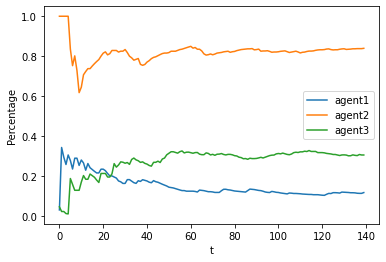

In [28]:
#plot the dynamic of the behavior

#plt.plot(result_list_123_each_round)
plt.plot(result_list_123_sum, label = "agent1")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_231_sum, label = "agent2")
#plt.plot(result_list_123_each_round)
plt.plot(result_list_312_sum, label = "agent3")
plt.legend()
plt.xlabel("t")
plt.ylabel("Percentage")
plt.show()

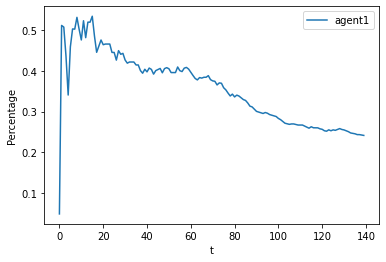

In [284]:
#plt the best responds of the behavior
plt.plot(result_list_123_sum, label = "agent1")
plt.legend()
plt.xlabel("t")
plt.ylabel("Percentage")
plt.show()

In [290]:

br_312 = result_list_312_sum
for i in range(len(br_312)):
    br_312[i] = 1 - br_312[i] 

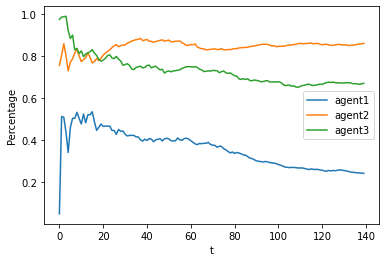

In [294]:
#best respond graph
plt.plot(result_list_123_sum, label = "agent1")
plt.plot(result_list_231_sum, label = "agent2")
plt.plot(br_312, label = "agent3")
plt.legend()
plt.xlabel("t")
plt.ylabel("Percentage")
plt.show()